In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
import pickle
import torch
from transformers import AutoModel, AutoTokenizer
from vncorenlp import VnCoreNLP

# phobert = AutoModel.from_pretrained("vinai/phobert-base")
# tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
# rdrsegmenter = VnCoreNLP("../vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [14]:
def price_segment(price):
    if price <= 2000000:
        return 1
    elif price <= 4000000:
        return 2
    elif price <= 7000000:
        return 3
    elif price <= 13000000:
        return 4
    elif price <= 20000000:
        return 5
    elif price > 20000000:
        return 6

In [16]:
df = pd.read_csv("item_detail.csv")
df = df.drop(['_id',"url_key","url_path","url_attendant_input_form","short_description", 'badges',"thumbnail_url","has_ebook"], axis=1)
df["name"] = df["name"].str.lower()
df["name"] = df["name"].map(lambda x: re.sub(r'\W+', ' ', x))
df["name"] = df["name"].str.replace('\s+', ' ', regex=True)
df["name"] = df["name"].str.replace("hàng chính hãng","")
df['price_segment'] = df.apply(lambda x: price_segment(x.price), axis=1)
df

,liked,video_url,current_seller.store_id,current_seller.product_id,current_seller.is_offline_installment_supported,current_seller.name,current_seller.slug,current_seller.price,current_seller.logo,current_seller.id,...,salable_type,price,add_on_title,add_on,seller_specifications,order_count,categories.id,categories.name,categories.is_leaf,price_segment
0,False,NaN,40395.0,67910639.0,NaN,Tiki Trading,tiki-trading,2790000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,2790000,Dịch Vụ Mua Kèm,"[{""list_price"":199000,""add_on_information_titl...","[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,2,Root,False,2
1,False,NaN,104503.0,68419593.0,NaN,TPlab Chuyên Linh Kiện PC,tplab-linh-kien-pc-gia-re,2550000.0,https://vcdn.tikicdn.com/ts/seller/21/08/f0/83...,112961.0,...,NaN,2550000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,11956,Mainboard - Board Mạch Chủ,True,2
2,False,NaN,13301.0,72613897.0,NaN,Binh Minh Audio,binhminhcentre,27000.0,https://vcdn.tikicdn.com/ts/seller/d0/61/7b/f0...,13759.0,...,NaN,27000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,4221,Điện Tử - Điện Lạnh,False,1
3,False,NaN,40395.0,243241.0,NaN,Tiki Trading,tiki-trading,8690000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,8690000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,4221,Điện Tử - Điện Lạnh,False,4
4,False,NaN,619.0,33518923.0,NaN,Công Nghệ Việt,cong-nghe-viet,239000.0,https://vcdn.tikicdn.com/ts/seller/ba/bb/e2/17...,656.0,...,NaN,239000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,1805,Loa Nghe Nhạc,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27426,False,NaN,84294.0,56839692.0,NaN,Mi A House,mi-a-house,1250000.0,https://vcdn.tikicdn.com/ts/seller/ca/2e/b3/c1...,90775.0,...,NaN,1250000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,30020,Máy Scan Mã Vạch,True,1
27427,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,950000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False,1
27428,False,NaN,149014.0,75298671.0,NaN,Thanh Tùng Technology,thanh-tung-technology,312000.0,https://vcdn.tikicdn.com/ts/seller/4b/54/1a/f3...,161873.0,...,NaN,312000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,28922,Bàn Phím Thay Thế Laptop,True,1
27429,False,NaN,42961.0,52040269.0,NaN,ĐẠI LÝ PHỤ KIỆN 72,dai-ly-phu-kien-72,189000.0,https://vcdn.tikicdn.com/ts/seller/05/20/b5/78...,44390.0,...,NaN,189000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False,1


In [19]:
df.to_pickle("./df.pkl")


## Thống kê theo brand

In [ ]:
df_list_brand = df["brand.name"].value_counts()
# len(df_list_brand)
df_list_brand.head(20)

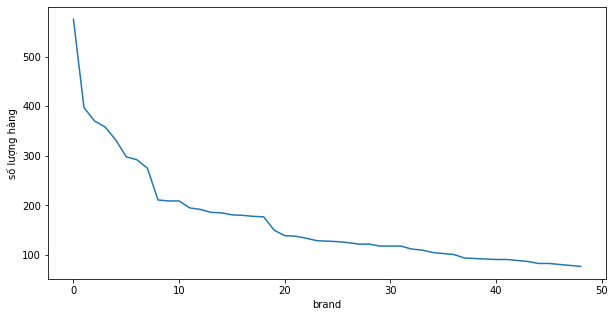

In [6]:
plt.figure(figsize=(10,5))
plt.plot(np.array(df_list_brand)[1:50])
plt.ylabel('số lượng hàng')
plt.xlabel('brand')
plt.show()

## Thống kê theo giá

In [7]:
df_price = np.array(df["price"])
np_price = np.sort(df_price)
np_price = np_price[-20000:-400]
np_price

array([  152400,   152500,   152500, ..., 32700000, 32870000, 32890000])

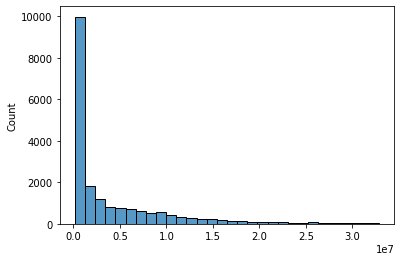

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=np_price, bins=int(30))
plt.show()

### Thống kê theo mức giá giảm

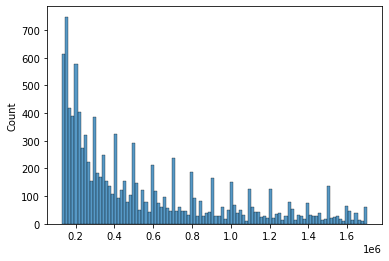

In [9]:
df_price_discount = np.array(df["discount"])
np_price_discount = np.sort(df_price_discount)
np_price_discount = np_price_discount[-15000:-4000]
np_price_discount
sns.histplot(data=np_price_discount, bins=int(100))
plt.show()

### thống kê theo % giảm giá

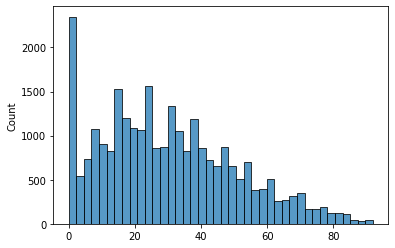

In [10]:
df_price_discount_rate = np.array(df["discount_rate"])
np_price_discount_rate = np.sort(df_price_discount_rate)

sns.histplot(data=np_price_discount_rate, bins=int(40))
plt.show()

## Thống kê rating 

### Số lượng rating

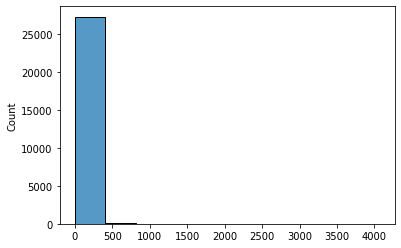

In [11]:
df_review_count = np.array(df["review_count"])
np_review_count = np.sort(df_review_count)
# np_review_count = np_review_count[np_review_count > 10]

np_review_count

sns.histplot(data=np_review_count, bins=int(10))
plt.show()

### rating average

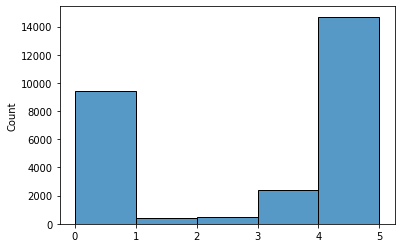

In [12]:
df_rating_average = np.array(df["rating_average"])
np_rating_average = np.sort(df_rating_average)
np_rating_average = np_rating_average

np_rating_average

sns.histplot(data=np_rating_average, bins=int(5))
plt.show()

# string similarity 

0.5

In [39]:
from scipy import spatial

def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


def sentence_to_vec(text):
    sentences = rdrsegmenter.tokenize(text) 
    sentences = " ".join(sentences[0])
    
    input_ids = torch.tensor([tokenizer.encode(sentences)])
    
    with torch.no_grad():
        output = phobert(input_ids)
        output = output[1].cpu().numpy()
        return output

def euclidean_distance(a,b):
    a = sentence_to_vec(a)
    b = sentence_to_vec(b)
    dist = np.linalg.norm(a-b)
    return dist

def cosine_distance(a,b):
#     a = sentence_to_vec(a)
#     b = sentence_to_vec(b)
    result = 1 - spatial.distance.cosine(a,b)
    return result

a =  "Điện Thoại Samsung Galaxy M31 (6GB/128GB)"

b =  "Chuột không dây sạc pin HXSJ T27, Chuột không dây cao cấp T27"
c =  "Ốp dẻo đen loại cao cấp cho Samsung Galaxy"
d =  "Ốp lưng silicon dẻo màu dành cho điện thoại Iphone 6/ 6S/ 6Plus/ 6S Plus/ 7/ 7 Plus/ 8/ 8 Plus/ X/ XS Max/ XR - Ốp chống bẩn, chống bám vân tay"

print(cosine_distance(a,b)) 
print(cosine_distance(a,c))
print(cosine_distance(a,d))
print(" ")
print(euclidean_distance(a,b)) 
print(euclidean_distance(a,c))
print(euclidean_distance(a,d))
print(" ")
print(get_jaccard_sim(a,b)) 
print(get_jaccard_sim(a,c))
print(get_jaccard_sim(a,d))

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=60723): Max retries exceeded with url: /handle (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ef213807748>: Failed to establish a new connection: [Errno 111] Connection refused',))

# upsell

In [17]:
# df_productset_group_name =  df["productset_group_name"].unique()
# df_productset_group_name.sort()
# df_productset_group_name

In [43]:
# df_smartphone = df[df["productset_group_name"] == "Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone"]
# df_phukien = df[df["productset_group_name"]=="Thiết Bị Số - Phụ Kiện Số/Phụ Kiện Điện Thoại và Máy Tính Bảng/Pin Sạc Dự Phòng/Pin Sạc Dự Phòng Di Động"]
# # df_phukien == 220 san pham
# # df_smartphone == 152 sanpham
# frames = [df_smartphone, df_phukien]

# df_smartphone = pd.concat(frames)
# df_smartphone

,liked,video_url,current_seller.store_id,current_seller.product_id,current_seller.is_offline_installment_supported,current_seller.name,current_seller.slug,current_seller.price,current_seller.logo,current_seller.id,...,salable_type,price,add_on_title,add_on,seller_specifications,order_count,categories.id,categories.name,categories.is_leaf,price_segment
0,False,NaN,40395.0,67910639.0,NaN,Tiki Trading,tiki-trading,2790000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,2790000,Dịch Vụ Mua Kèm,"[{""list_price"":199000,""add_on_information_titl...","[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,2,Root,False,2
50,False,NaN,129388.0,59525486.0,NaN,SOI STORE HN,soi-store-vn,18990000.0,https://vcdn.tikicdn.com/ts/seller/4b/54/1a/f3...,140134.0,...,NaN,18990000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,1789,Điện Thoại - Máy Tính Bảng,False,5
72,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9990000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,1795,Điện thoại Smartphone,True,4
119,False,NaN,40395.0,58065350.0,NaN,Tiki Trading,tiki-trading,2350000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,2350000,Dịch Vụ Mua Kèm,"[{""add_on_description_list"":[""SẢN PHẨM HIỆN ĐA...","[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,2,Root,False,2
240,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9990000,NaN,NaN,"[{""value"":null,""name"":""Tiki hoàn tiền 111% nếu...",0,1795,Điện thoại Smartphone,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26804,False,NaN,40395.0,71519282.0,NaN,Tiki Trading,tiki-trading,1140000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,1140000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,2,Root,False,1
26827,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,669000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False,1
26860,False,NaN,40395.0,23854909.0,NaN,Tiki Trading,tiki-trading,347000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,NaN,347000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False,1
27102,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,680000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,28454,Pin Sạc Dự Phòng Di Động,True,1


In [41]:
df_smartphone_id = df.head(20).id
df_smartphone_id

0     67910637
1     68419590
2     72613895
3       524297
4     17039371
5     58982415
6     57147408
7     45350929
8     69337115
9     70385695
10    43778085
11    72089640
12    23068715
13     9830444
14    72613933
15     9044018
16    71958579
17    59506739
18      524345
19      524346
Name: id, dtype: int64

In [42]:
import itertools
# pair_id = list(itertools.permutations(df_smartphone_id, 2))
pair_id = list(itertools.combinations(df_smartphone_id, 2))
len(pair_id)

190

In [27]:
chunks = [pair_id[x:x+1000000] for x in range(0, len(pair_id), 1000000)]
chunks = np.array(chunks)
chunks.shape

/home/anhnt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(377,)

In [37]:

for count, value in enumerate(chunks):
#     print(count)
    with open('pair_id_'+str(count)+'.pkl', 'wb') as f:
        pickle.dump(value, f)
        print("done", count)

done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 100
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 122
don

In [24]:
for i in 



In [43]:
df_pair_id = pd.DataFrame(pair_id)
df_pair_id = df_pair_id.rename(columns={0: 'from_id',1:"to_id"})
df_pair_id

,from_id,to_id
0,67910637,68419590
1,67910637,72613895
2,67910637,524297
3,67910637,17039371
4,67910637,58982415
...,...,...
185,71958579,524345
186,71958579,524346
187,59506739,524345
188,59506739,524346


In [ ]:

a =  "Điện Thoại Samsung Galaxy M31 (6GB/128GB)"

b =  "Chuột không dây sạc pin HXSJ T27, Chuột không dây cao cấp T27"

a = senten


In [46]:
import time

time_start = time.time()

for index, row in df_pair_id.head(50).iterrows():
    print(index)
    df_item_from = df[df["id"] == row['from_id']]
    df_item_to = df[df["id"] == row['to_id']]

#     a = sentence_to_vec(df_item_from["name"].values[0])
#     b = sentence_to_vec(df_item_to["name"].values[0])

    df_pair_id.loc[index, "name_from"] = df_item_from["name"].values[0]
    df_pair_id.loc[index, "name_to"] = df_item_to["name"].values[0]

    df_pair_id.loc[index, "same_category"] =(df_item_from["productset_group_name"].values == df_item_to["productset_group_name"].values)
    df_pair_id.loc[index, "same_brand_name"] =(df_item_from["brand.id"].values == df_item_to["brand.id"].values)
    df_pair_id.loc[index, "same_current_seller"] =(df_item_from["current_seller.id"].values == df_item_to["current_seller.id"].values)

#     df_pair_id.loc[index, "euclidean_distance"] = euclidean_distance(a,b)
#     df_pair_id.loc[index, "cosine_distance"] = cosine_distance(a,b)

    df_pair_id.loc[index, "more_expensive"] =(df_item_from["price"].values - df_item_to["price"].values)
    df_pair_id.loc[index, "more_discount"] =(df_item_from["discount"].values - df_item_to["discount"].values)
    df_pair_id.loc[index, "more_discount_rate"] =(df_item_from["discount_rate"].values - df_item_to["discount_rate"].values)
    df_pair_id.loc[index, "more_price_segment"] =(df_item_from["price_segment"].values - df_item_to["price_segment"].values)
    df_pair_id.loc[index, "more_rating"] =(df_item_from["rating_average"].values - df_item_to["rating_average"].values)
    df_pair_id.loc[index, "older"] =(df_item_from["day_ago_created"].values - df_item_to["day_ago_created"].values)
    df_pair_id.loc[index, "more_review_count"] =(df_item_from["review_count"].values - df_item_to["review_count"].values)


time_exc = time.time() - time_start
time_exc

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


0.3467881679534912

In [52]:
# https://tiki.vn/dien-thoai-samsung-galaxy-m31-6gb-128gb-hang-chinh-hang-p58259141.html?src=ss-organic 
id_example = 58259141

In [53]:
df_example_from = df_pair_id[df_pair_id["from_id"] == id_example]
df_example_from

,from_id,to_id,name_from,name_to,same_category,same_brand_name,same_current_seller,euclidean_distance,cosine_distance,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
22341,58259141,33815238,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone 11 pro 64gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-18710000.0,-7790000.0,-1.0,-3.0,-0.5,-297.0,1235.0
22342,58259141,14913733,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone xs 256gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-13310000.0,-15190000.0,-21.0,-2.0,-0.5,-442.0,1242.0
22343,58259141,63084235,điện thoại samsung galaxy m31 6gb 128gb,điện thoại vsmart live 4,True,False,False,3.867002,0.758221,330000.0,1470000.0,21.0,0.0,0.0,40.0,1229.0
22344,58259141,33969367,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone 11 256gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-16110000.0,-4390000.0,5.0,-3.0,-0.5,-297.0,1238.0
22345,58259141,34478313,điện thoại samsung galaxy m31 6gb 128gb,điện thoại oppo a5 4gb 128gb,True,False,True,3.867002,0.758221,900000.0,100000.0,-3.0,1.0,0.0,-294.0,1209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22641,58259141,48493605,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng anker powercore metro essenti...,False,False,True,3.867002,0.758221,3550000.0,1740000.0,23.0,2.0,-0.5,-149.0,1210.0
22642,58259141,58848397,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng polymer xiaomi mi essential 1...,False,False,False,3.867002,0.758221,4021000.0,1770000.0,24.0,2.0,0.0,14.0,1231.0
22643,58259141,19264833,điện thoại samsung galaxy m31 6gb 128gb,sạc dự phòng pisen easy 5c 10000mah type c 2a ...,False,False,True,3.867002,0.758221,4343000.0,1687000.0,3.0,2.0,0.0,-410.0,1230.0
22644,58259141,73398642,điện thoại samsung galaxy m31 6gb 128gb,bộ pin sạc nhanh dự phòng 2h panasonic k kj55m...,False,False,False,3.867002,0.758221,4010000.0,1800000.0,28.0,2.0,-0.5,133.0,1233.0


In [54]:
df_example_to = df_pair_id[df_pair_id["to_id"] == id_example]
df_example_to["more_expensive"] = 0 - df_example_to["more_expensive"]
df_example_to["more_discount"] = 0 - df_example_to["more_discount"]
df_example_to["more_discount_rate"] = 0 - df_example_to["more_discount_rate"]
df_example_to["more_price_segment"] = 0 - df_example_to["more_price_segment"]
df_example_to["more_rating"] = 0 - df_example_to["more_rating"]
df_example_to["older"] = 0 - df_example_to["older"]
df_example_to["more_review_count"] = 0 - df_example_to["more_review_count"]

df_example_to["from_id_new"] = df_example_to["to_id"]
df_example_to["to_id"] =  df_example_to["from_id"]
df_example_to["from_id"] = df_example_to["from_id_new"]
df_example_to = df_example_to.drop(["from_id_new"], axis=1)

df_example_to

/home/anhnt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anhnt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/anhnt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,from_id,to_id,name_from,name_to,same_category,same_brand_name,same_current_seller,euclidean_distance,cosine_distance,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
65,58259141,67910637,điện thoại vsmart joy 4,điện thoại samsung galaxy m31 6gb 128gb,True,False,True,3.867002,0.758221,1900000.0,1300000.0,13.0,1.0,0.0,62.0,244.0
435,58259141,36700352,điện thoại iphone 8 plus vn a,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-14300000.0,1800000.0,28.0,-2.0,-0.2,-275.0,1143.0
804,58259141,72745246,máy tính bảng samsung galaxy tab s6 lite đã kí...,điện thoại samsung galaxy m31 6gb 128gb,True,True,False,3.867002,0.758221,-5300000.0,1800000.0,28.0,-1.0,4.5,132.0,1243.0
1172,58259141,58065346,điện thoại realme c11 2gb 32gb,điện thoại samsung galaxy m31 6gb 128gb,True,False,True,3.867002,0.758221,2340000.0,1460000.0,15.0,1.0,0.0,-3.0,1221.0
1539,58259141,58459136,điện thoại oppo reno 4 pro 8gb 256gb,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-5300000.0,-1200000.0,5.0,-1.0,-0.5,6.0,1216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20805,58259141,12630187,điện thoại huawei p30 lite,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-800000.0,-200000.0,1.0,0.0,0.5,-477.0,1231.0
21114,58259141,54913203,điện thoại samsung galaxy a11 32gb 3gb đã kích...,điện thoại samsung galaxy m31 6gb 128gb,True,True,False,3.867002,0.758221,1400000.0,1400000.0,17.0,1.0,0.0,-56.0,1154.0
21422,58259141,11589307,điện thoại oppo f11 pro 6gb 64gb,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-800000.0,-1200000.0,-7.0,0.0,0.0,-492.0,1161.0
21729,58259141,56027838,điện thoại samsung galaxy a21s đã kích hoạt bả...,điện thoại samsung galaxy m31 6gb 128gb,True,True,False,3.867002,0.758221,900000.0,900000.0,9.0,1.0,0.0,-43.0,1115.0


In [57]:
frames = [df_example_from, df_example_to]
df_example = pd.concat(frames)
df_example

,from_id,to_id,name_from,name_to,same_category,same_brand_name,same_current_seller,euclidean_distance,cosine_distance,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
22341,58259141,33815238,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone 11 pro 64gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-18710000.0,-7790000.0,-1.0,-3.0,-0.5,-297.0,1235.0
22342,58259141,14913733,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone xs 256gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-13310000.0,-15190000.0,-21.0,-2.0,-0.5,-442.0,1242.0
22343,58259141,63084235,điện thoại samsung galaxy m31 6gb 128gb,điện thoại vsmart live 4,True,False,False,3.867002,0.758221,330000.0,1470000.0,21.0,0.0,0.0,40.0,1229.0
22344,58259141,33969367,điện thoại samsung galaxy m31 6gb 128gb,điện thoại iphone 11 256gb hàng nhập khẩu,True,False,False,3.867002,0.758221,-16110000.0,-4390000.0,5.0,-3.0,-0.5,-297.0,1238.0
22345,58259141,34478313,điện thoại samsung galaxy m31 6gb 128gb,điện thoại oppo a5 4gb 128gb,True,False,True,3.867002,0.758221,900000.0,100000.0,-3.0,1.0,0.0,-294.0,1209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20805,58259141,12630187,điện thoại huawei p30 lite,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-800000.0,-200000.0,1.0,0.0,0.5,-477.0,1231.0
21114,58259141,54913203,điện thoại samsung galaxy a11 32gb 3gb đã kích...,điện thoại samsung galaxy m31 6gb 128gb,True,True,False,3.867002,0.758221,1400000.0,1400000.0,17.0,1.0,0.0,-56.0,1154.0
21422,58259141,11589307,điện thoại oppo f11 pro 6gb 64gb,điện thoại samsung galaxy m31 6gb 128gb,True,False,False,3.867002,0.758221,-800000.0,-1200000.0,-7.0,0.0,0.0,-492.0,1161.0
21729,58259141,56027838,điện thoại samsung galaxy a21s đã kích hoạt bả...,điện thoại samsung galaxy m31 6gb 128gb,True,True,False,3.867002,0.758221,900000.0,900000.0,9.0,1.0,0.0,-43.0,1115.0


In [59]:
df_example = df_example[ df_example["same_category"] == False]
df_example.sort_values(by=['euclidean_distance'])

,from_id,to_id,name_from,name_to,same_category,same_brand_name,same_current_seller,euclidean_distance,cosine_distance,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
22426,58259141,20055781,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng romoss simple 20 20 000mah nh...,False,False,True,3.867002,0.758221,4368100.0,1631900.0,-6.0,2.0,0.5,-399.0,1218.0
22566,58259141,14237430,điện thoại samsung galaxy m31 6gb 128gb,chưa pin box sạc dự phòng 4 cell bestoca p4 đ...,False,False,False,3.867002,0.758221,4511000.0,1730000.0,0.0,2.0,0.5,-456.0,1205.0
22567,58259141,35864868,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng anker powercore select 20000m...,False,False,True,3.867002,0.758221,3740000.0,1750000.0,23.0,2.0,0.0,-283.0,1136.0
22568,58259141,62737062,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng đa dụng công suất cao baseus ...,False,False,False,3.867002,0.758221,3807000.0,1411000.0,-3.0,2.0,-0.5,45.0,1231.0
22569,58259141,52251619,điện thoại samsung galaxy m31 6gb 128gb,sạc dự phòng energizer 10000mah ue10043 tích h...,False,False,True,3.867002,0.758221,4186000.0,1704000.0,12.0,2.0,0.0,-95.0,1192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22503,58259141,13939952,điện thoại samsung galaxy m31 6gb 128gb,sạc dự phòng kiêm bật lửa đèn pin siêu sáng,False,False,False,3.867002,0.758221,4400000.0,1700000.0,2.0,2.0,0.0,-462.0,1239.0
22504,58259141,54048623,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng anker powercore redux 10000ma...,False,False,True,3.867002,0.758221,3977000.0,1763000.0,23.0,2.0,0.0,-73.0,1236.0
22505,58259141,54048660,điện thoại samsung galaxy m31 6gb 128gb,pin sạc dự phòng anker powerhouse 200wh 57600m...,False,False,True,3.867002,0.758221,-3860000.0,850000.0,18.0,-1.0,0.5,-73.0,1237.0
22494,58259141,68593547,điện thoại samsung galaxy m31 6gb 128gb,pin dự phòng sạc nhanh baseus starlight digita...,False,False,False,3.867002,0.758221,4293000.0,1207000.0,-32.0,2.0,1.0,75.0,1236.0


In [79]:
# đắt hơn
df_example = df_example[df_example["more_expensive"] <= 0 ]
# cùng brand
# df_example = df_example[df_example["same_brand_name"]]

df_example.sort_values(by=['score_upsell'])

,from_id,to_id,same_category,same_brand_name,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
7821,58259141,33815238,True,False,-18710000.0,-7790000.0,-1.0,-3.0,-0.5,-297.0,1235.0
7822,58259141,14913733,True,False,-13310000.0,-15190000.0,-21.0,-2.0,-0.5,-442.0,1242.0
7824,58259141,33969367,True,False,-16110000.0,-4390000.0,5.0,-3.0,-0.5,-297.0,1238.0
7826,58259141,58616042,True,True,-23300000.0,-200000.0,21.0,-3.0,0.0,10.0,1142.0
7828,58259141,8339694,True,False,-2300000.0,-8200000.0,-31.0,0.0,-0.5,-575.0,1239.0
...,...,...,...,...,...,...,...,...,...,...,...
7204,58259141,73113762,True,False,-2100000.0,1100000.0,19.0,0.0,0.0,125.0,1224.0
7295,58259141,73091235,True,False,0.0,-500000.0,-5.0,0.0,0.0,125.0,1211.0
7385,58259141,12630187,True,False,-800000.0,-200000.0,1.0,0.0,0.5,-477.0,1231.0
7562,58259141,11589307,True,False,-800000.0,-1200000.0,-7.0,0.0,0.0,-492.0,1161.0


In [80]:
from sklearn.preprocessing import MinMaxScaler

list_col_scale = ["more_expensive","more_discount","more_discount_rate","more_price_segment","more_rating","older","more_review_count"]

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
df_example[list_col_scale] = min_max_scaler.fit_transform(df_example[list_col_scale])
df_example

/home/anhnt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anhnt1/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,from_id,to_id,same_category,same_brand_name,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count
7821,58259141,33815238,True,False,-0.060057,0.158403,0.09375,-1.000000,-1.0,0.950285,0.969052
7822,58259141,14913733,True,False,0.245892,-0.491005,-0.53125,-0.333333,-1.0,0.934715,0.996132
7824,58259141,33969367,True,False,0.087252,0.456779,0.28125,-1.000000,-1.0,0.950285,0.980658
7826,58259141,58616042,True,True,-0.320113,0.824484,0.78125,-1.000000,-0.8,0.983249,0.609284
7828,58259141,8339694,True,False,0.869688,0.122422,-0.84375,1.000000,-1.0,0.920434,0.984526
...,...,...,...,...,...,...,...,...,...,...,...
7204,58259141,73113762,True,False,0.881020,0.938570,0.71875,1.000000,-0.8,0.995598,0.926499
7295,58259141,73091235,True,False,1.000000,0.798157,-0.03125,1.000000,-0.8,0.995598,0.876209
7385,58259141,12630187,True,False,0.954674,0.824484,0.15625,1.000000,-0.6,0.930957,0.953578
7562,58259141,11589307,True,False,0.954674,0.736727,-0.09375,1.000000,-0.8,0.929346,0.682785


In [86]:
# more_expensive = 0.1
# more_discount = 0.05
# more_discount_rate = 0.05
# more_price_segment = 0.1
# more_rating = 0.1
# older = 0.2
# more_review_count = 0.1
# same_brand_name = 0.3

# => sum = 1

df_example["score_upsell"] = df_example["more_expensive"] * (-0.1)
df_example["score_upsell"] += df_example["more_discount"] * (-0.05)
df_example["score_upsell"] += df_example["more_discount_rate"] * (-0.05)
df_example["score_upsell"] += df_example["more_price_segment"] * (-0.1)
df_example["score_upsell"] += df_example["more_rating"] * (-0.1)
df_example["score_upsell"] += df_example["older"] * (0.2)
df_example["score_upsell"] += df_example["more_review_count"] * (-0.1)
df_example["score_upsell"] += df_example["same_brand_name"] * (0.3)


df_example = df_example[df_example["score_upsell"] >= 0]
df_example.sort_values(by=['score_upsell'])

,from_id,to_id,same_category,same_brand_name,more_expensive,more_discount,more_discount_rate,more_price_segment,more_rating,older,more_review_count,score_upsell
7893,58259141,35729872,True,False,0.966006,0.675296,-0.28125,1.000000,-0.80,0.951680,0.516441,0.00238911
7887,58259141,70833091,True,False,0.841360,0.912242,0.62500,0.333333,-1.00,0.991947,0.976789,0.00637901
7841,58259141,53090589,True,False,0.557507,0.956999,0.87500,0.333333,-0.80,0.972834,0.860735,0.00780926
5395,58259141,17510512,True,False,0.909348,0.412023,-0.62500,1.000000,-1.00,0.937721,0.976789,0.00957939
7890,58259141,53135819,True,False,0.558074,0.780606,0.46875,0.333333,-0.60,0.972834,0.903288,0.0126294
7836,58259141,71095046,True,False,0.614731,0.956121,0.87500,0.333333,-1.00,0.994094,0.980658,0.0143906
7898,58259141,74489817,True,False,0.835694,0.877139,0.50000,0.333333,-1.00,0.998711,0.949710,0.0190116
2479,58259141,67057190,True,False,0.971671,0.868363,0.31250,1.000000,-1.00,0.988940,0.094778,0.0321
7828,58259141,8339694,True,False,0.869688,0.122422,-0.84375,1.000000,-1.00,0.920434,0.984526,0.0347317
3005,58259141,10732592,True,False,0.671388,0.780606,0.40625,0.333333,-1.00,0.927199,0.899420,0.0356828


In [39]:
# top 1
# https://tiki.vn/dien-thoai-samsung-galaxy-m31-6gb-128gb-hang-chinh-hang-p35729872.html?src=ss-organic
# top 2
# https://tiki.vn/dien-thoai-samsung-galaxy-m31-6gb-128gb-hang-chinh-hang-p70833091.html?src=ss-organic

In [33]:
df

,liked,video_url,current_seller.store_id,current_seller.product_id,current_seller.is_offline_installment_supported,current_seller.name,current_seller.slug,current_seller.price,current_seller.logo,current_seller.id,...,inventory_status,salable_type,price,add_on_title,add_on,seller_specifications,order_count,categories.id,categories.name,categories.is_leaf
0,False,NaN,40395.0,67910639.0,NaN,Tiki Trading,tiki-trading,2790000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,available,NaN,2790000,Dịch Vụ Mua Kèm,"[{""list_price"":199000,""add_on_information_titl...","[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,2,Root,False
1,False,NaN,104503.0,68419593.0,NaN,TPlab Chuyên Linh Kiện PC,tplab-linh-kien-pc-gia-re,2550000.0,https://vcdn.tikicdn.com/ts/seller/21/08/f0/83...,112961.0,...,available,NaN,2550000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,11956,Mainboard - Board Mạch Chủ,True
2,False,NaN,13301.0,72613897.0,NaN,Binh Minh Audio,binhminhcentre,27000.0,https://vcdn.tikicdn.com/ts/seller/d0/61/7b/f0...,13759.0,...,available,NaN,27000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,4221,Điện Tử - Điện Lạnh,False
3,False,NaN,40395.0,243241.0,NaN,Tiki Trading,tiki-trading,8690000.0,https://vcdn.tikicdn.com/ts/seller/ee/fa/a0/98...,1.0,...,available,NaN,8690000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,4221,Điện Tử - Điện Lạnh,False
4,False,NaN,619.0,33518923.0,NaN,Công Nghệ Việt,cong-nghe-viet,239000.0,https://vcdn.tikicdn.com/ts/seller/ba/bb/e2/17...,656.0,...,available,NaN,239000,NaN,NaN,"[{""url"":null,""name"":""Tiki hoàn tiền 111% nếu p...",0,1805,Loa Nghe Nhạc,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27426,False,NaN,84294.0,56839692.0,NaN,Mi A House,mi-a-house,1250000.0,https://vcdn.tikicdn.com/ts/seller/ca/2e/b3/c1...,90775.0,...,available,NaN,1250000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,30020,Máy Scan Mã Vạch,True
27427,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,discontinued,NaN,950000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False
27428,False,NaN,149014.0,75298671.0,NaN,Thanh Tùng Technology,thanh-tung-technology,312000.0,https://vcdn.tikicdn.com/ts/seller/4b/54/1a/f3...,161873.0,...,available,NaN,312000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,28922,Bàn Phím Thay Thế Laptop,True
27429,False,NaN,42961.0,52040269.0,NaN,ĐẠI LÝ PHỤ KIỆN 72,dai-ly-phu-kien-72,189000.0,https://vcdn.tikicdn.com/ts/seller/05/20/b5/78...,44390.0,...,available,NaN,189000,NaN,NaN,"[{""name"":""Tiki hoàn tiền 111% nếu phát hiện hà...",0,1815,Thiết Bị Số - Phụ Kiện Số,False
